# Introduzione ai metodi Monte Carlo (MC)

Mario Fiorino



Il metodo Monte Carlo è una tecnica statistica utilizzata per trovare soluzioni approssimate attraverso il campionamento casuale (*random sampling*). In sostanza, gli approcci Monte Carlo, nelle loro diverse declinazioni, impiegano il campionamento casuale per generare dati, i quali vengono successivamente utilizzati per approssimare e stimare un valore. Per capirci di più vedere esempio : https://github.com/PacktPublishing/Deep-Reinforcement-Learning-with-Python/blob/master/04.%20Monte%20Carlo%20Methods/.ipynb_checkpoints/4.01.%20Understanding%20the%20Monte%20Carlo%20Method-checkpoint.ipynb , dove si vuole calcolre il valore atteso (expected value): $\mathbb{E}[X]$, quando non si conosce esplicitamente la funzione di probabilità $p(x_{i})$.

$\;$

**Metodi Monte Carlo per il Reinforcement Learning**

Nel contesto Reinforcement Learning (RL), un algoritmo model-free (in contrapposizione a uno model-based) è un algoritmo che non presuppone una conoscenza completa della dinamica dell'ambiente: concretamente non necessitano della funzione di transizione di stato (transition model) e della funzione di ricompensa che definiscono la dinamica dell'ambiete markoviano (MDP).

Un algoritmo RL model-free può essere pensato come un algoritmo esplicito *trial-and-error*; in quanto
gli agenti sfruttano esclusivamente i dati derivanti dall'interazione con l'ambiente, senza la necessità di un modello del sistema. Monte Carlo Control, SARSA, Q-learning e Actor-Critic sono algoritmi RL model-free.

I metodi Monte Carlo nel RL si basano sulla generazione di numerosi (per sfruttare la legge dei grandi numeri) episodi o traiettorie all'interno dell'ambiente, per ottenere stime della funzione valore (value function), o dei parametri della policy ottimale. Questi metodi richiedono solo "esperienza", ovvero sequenze di esempi di stati, azioni e ricompense derivanti dall'interazione reale o simulata con l'ambiente, senza necessitare di una conoscenza preliminare dello stesso.

Nota 1: Apprendere da una simulazione necessita di un modello-campionario che serve solo a generare campioni, non le distribuzioni di probabilità complete di tutte le possibili transizioni necessarie per la programmazione dinamica. In molti casi, è sorprendentemente facile generare esperienza campionata secondo le distribuzioni di probabilità desiderate, ma impossibile ottenere tali distribuzioni in forma esplicita.

Nota 2: I metodi MC assumono che l'esperienza sia suddivisa in episodi, ovvero sequenze di interazioni con l'ambiente che terminano in stati finali (detti anche *terminali* o *stati di assorbimento* , in quanto una volta raggiunti, non permettono più all'agente di effettuare transizioni verso altri stati).

Nota 3: A ogni episodio, i valori della funzione di valore o i parametri della policy (policy) vengono aggiornati in base ai "Return" (somma cumulativa delle ricompense ottenute - vedi notazioni successive) campionati, migliorando progressivamente le stime dei valori ottimali cercati.


### Concetti di base

Una **traiettoria** $\tau$ è una sequenza di stati e azioni in un certo ambiente:

$\tau = (s_0, a_0, s_1, a_1, s_2,...)$

Dove $s_0$ è lo stato di partenza, $a_0$ l'azione esegutia in tale stato, mentre $s_1$ è lo stato ottenuto dopo esecuzione dell'azione $a_0$, ect ...

Le traiettorie sono spesso chiamate anche **episodi** o rolluot.

La funzione di ricompensa (o reward function) $R$ dipende dallo stato attuale, dall’azione intrapresa in quello stato, e dal prossimo stato ottenuto:

$r_t = R(s_t, a_t, s_{t+1})$

L’obiettivo dell’agente è accumulare il maggior numero di ricompense ricevibili in un certo ambiente, durante un episodio: ovvero trovare tra le tante traiettorie $\tau$ possibili, che partono da un certo stato iniziale al tempo $t=0$, quella che  massimizza il valore:

$R(\tau) = \sum_{t=0}^{T} \gamma^{t} r_{t}$

$R(\tau)$ è detto anche **Return**.

Spesso si trova l'epressione *Return parziale* :

$R_t(\tau) = \sum_{t'=t}^{T} \gamma^{t'-t} r_{t'}$

per indicare la somma scontata delle ricompense a partire dal passo temporale $t$ fino alla fine della traiettoria.  In modo equivalente, si parla di "Return da uno stato $s_k$" per riferirsi alla somma associata a una traiettoria che ha come stato iniziale $s_k$.

$\gamma$ : detto **discount factor**, è un parametro che assume valori nell'intervallo $(0,1)$, e determina il peso delle ricompense future rispetto a quelle immediate (ovvero in prossimità dello step corrente).

Una variazione di $\gamma$ modifica la percezione dell'agente riguardo alla natura del problema di RL. Se $\gamma$ è basso, l'agente tende a focalizzarsi maggiormente sulle ricompense immediate, attribuendo meno importanza a quelle future.

Si dice che questo porta a una riduzione *dell'orizzonte temporale del problema*, concentrandosi solo su un numero limitato di step futuri (e spesso velocizzando il training).

La scelta del valore di $\gamma$ dipende dalla natura del problema.

La tabella sotto illustra l'effetto dello "sconto" applicato a una ricompensa ricevuta dopo $k$ step, per diversi valori di $\gamma$. In sostanza espicita il valore nuemrico di $\gamma^k$.

Questa rappresentazione aiuta a comprendere l'orizzonte temporale del problema per un agente in funzione del valore di $\gamma$

Ad esempio, se $\gamma = 0.8$ , l'orizzonte effettivo del problema si estende a circa $10$ step; mentre se $\gamma = 0.99$, l'orizzonte rimane significativo anche a circa $200-500$ step.


| $\gamma$     | $\gamma^{10}$   | $\gamma^{50}$    | $\gamma^{100}$   | $\gamma^{200}$   | $\gamma^{500}$   | $\gamma^{1000}$  | $\gamma^{2000}$  |
|-------|--------|--------|--------|--------|--------|--------|--------|
| 0.8   | 0.11   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| 0.9   | 0.35   | 0.01   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| 0.95  | 0.60   | 0.08   | 0.01   | 0.00   | 0.00   | 0.00   | 0.00   |
| 0.99  | 0.90   | 0.61   | 0.37   | 0.13   | 0.07   | 0.00   | 0.00   |
| 0.995 | 0.95   | 0.78   | 0.61   | 0.37   | 0.08   | 0.01   | 0.00   |
| 0.999 | 0.99   | 0.95   | 0.90   | 0.82   | 0.61   | 0.37   | 0.14   |
| 0.9997| 0.997  | 0.985  | 0.970  | 0.942  | 0.861  | 0.741  | 0.549  |



**Tipologie di Return:**

Una possibile formulazione del return è il *finite-horizon undiscounted return*, che corrisponde semplicemente alla somma delle ricompense ottenute all'interno di un orizzonte temporale fisso, senza l'applicazione del *discount factor*:

$R(\tau) = \sum_{t=0}^T r_t$.

Nel testo di Sutton & Barto troverete la seguente simbologia per il return:
$G_{t} =  r_{t+1} + r_{t+2} + r_{t+3} + ... + r_{T}$
 , cioè la somma di reward ricevuti dopo lo step $t$.


Un altro tipo di return, utilizzato per i "continuing tasks", cioè quelli che non hanno uno stato terminale, è il *infinite-horizon undiscounted return*: che è la somma inifinita di tutti i reward ottenuti dall'agente, ma scontati di un fattore  $\gamma$ :

$R(\tau) = \sum_{t=0}^{\infty} \gamma^t r_t.$

$\;$

Nota 1: La seguente proprietà che esprime il return  in modo ricorsivo, collegandolo al return ottenuto in passaggi temporali successivi.

$R(\tau) =  \gamma^0 r_0 + \gamma^1 r_1 + \gamma^2 r_2 + \gamma^3 r_3 + ... .$

$R(\tau) =   r_0 + \gamma( r_1 + \gamma^1 r_2 + \gamma^2 r_3 + ... ).$

$R(\tau) =   r_0 + \gamma (R_{t=t_{1}}(\tau))$

$\;$

**Funzioni valore**

**State-value function**, $V^{\pi}(s)$, fornisce l' *expected return* associato a uno stato $s$, nel caso in cui l'agente inizi la sua interazione con ambiente in tale stato, e segua una data policy $\pi$ durante il processo decisionale:

$V^{\pi}(s) = \mathbb{E}_{s_0 = s,\ \tau \sim \pi} \; [R(\tau)]$

**Action-value function**, $Q^{\pi}(s,a)$, fornisce l' *expected return* associato a una coppia stato-azione $(s, a)$, se  l'agente inizia nello stato s, qui esegue l'azione $a$ (che potrebbe non provenire dalla policy $\pi$),  e, successivamente, dopo tale l'azione, adotta la politica $\pi$ in modo permanente:

$Q^{\pi}(s,a) = \mathbb{E}_{s_0 = s,\ a_0 = a,\ \tau \sim \pi} \; [R(\tau)]$

In seguito vedremo come $Q^{\pi}(s,a)$ ha il vantaggio rispetto a $V^{\pi}(s)$ di fornire agli agenti un metodo diretto per determinare l'azione da intraprendere.

$Q^{\pi}(s,a)$ può essere anche pensata come una forma di archiviazione del *one-step lookahead* per ogni azione $a$ in ogni stato $s$

$\;$

**Relazioni tra due funzioni valore**

La funzione valore di stato $V^{\pi}(s)$ può essere espressa in termini della funzione azione-valore $Q^{\pi}(s,a)$ :

$V^{\pi}(s) = \mathbb{E}_{a\sim \pi(s)}{[Q^{\pi}(s,a)]}$

ovvero : $V^{\pi}$  è un *expectation* su $Q^{\pi}$ per tutte le azioni $a$ disponibili in un particolare stato $s$, seguendo la policy $π$

$\;$

Inoltre, si consideri la policy ottimale $\pi^*$, la relativa *Optimal Value Function* :

$V^{\pi^*}(s) = \underset{\pi}\max \; \mathbb{E}_{s_0 = s,\ \tau \sim \pi}[{R(\tau)]}$

e *Optimal Action-Value Function* :

$Q^{\pi^*}(s,a) = \underset{\pi}\max \; \mathbb{E}_{s_0 = s,\ a_0 = a,\ \tau \sim \pi} \; [R(\tau)]$

Dove il termine " $\underset{\pi}\max$ " indica l'operazione di massimizzazione sull'insieme delle policy disponibili. In pratica, dice di selezionare la policy che produce il valore massimo dell'*expectation*.

Vale, chiaramente, la relazione:

$V^{\pi^*}(s) = \underset{a} \max \; Q^{\pi^*}(s,a)$.

$\;$

Ref:

Reinforcement Learning: An Introduction; Richard S. Sutton and Andrew G. Barto, Second Edition - MIT Press, Cambridge, 2018.

Spinning Up in Deep RL by OpenAI:

https://spinningup.openai.com/en/latest/spinningup/rl_intro.html

Foundations of Deep Reinforcement Learning: Theory and Practice in Python di Laura Graesser, Wah Loon Keng.

Simbologia matematica usata:

<div>
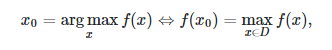
</div>

# Monte Carlo Prediction (policy evaluation)

Iniziamo considerando i metodi Monte Carlo per ricavare la funzione valore per una policy arbitraria.


### Comprendere il gioco del BlackJack (BJ) in Gym


Regole del gioco : https://www.gymlibrary.dev/environments/toy_text/blackjack/




In [ ]:
import gym
import pandas as pd
from collections import defaultdict
import numpy as np
import random

import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from IPython import display
import pygame


env = gym.make('Blackjack-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Dimention Action Space: {env.action_space.n}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Range: {env.reward_range}")

query_environment('Blackjack-v1')

In [ ]:
# Inizializza il gioco
state = env.reset()
done = False

# Stampa lo stato attuale del gioco : state
# Questo consiste in un consiste in una tupla di 3 elementii:
# state[0] : la somma  attuale del giocatore,
# state[1] : il valore della carta scoperta del banco (1-10 dove 1 è un asso)
# state[2] : Se il giocatore ha un asso “usable” (True o False)
# Nota: Nel BJ gli assi possono contare come 11 (sono detti “usable”) o 1.
print("Stato attuale: ", state)


# Ripeti il gioco fino alla sua fine
while not done:

    # Ci sono due tipi di azione:
    # Richiedi carte aggiuntive, una per una (hit = 1)
    # Stai (stick = 0)
    action = env.action_space.sample() # campionamento casuale di un'azione
    if action == 0:
      print(" Azione 0: Stick!")
    else:
      print(" Azione 1: Hit!")
    #print(f"Taking action: {action}")

    # Esegui l'azione ed osserva il risultato
    next_state, reward, done, _ = env.step(action)


    # Stato del gioco dopo la mossa effettuata
    print(f"Stato ottenuto dopo la mossa: {next_state}")

    # Update the state
    state = next_state

    #Reward
    #win game: +1
    #lose game: -1
    #draw game: 0
    print(f" Reward : {reward}")
    print(f" Il gioco è terminato? : {done}") # se arriviamo allo stato terminale allora done == True


#Il gioco è finito
env.close()


Stato attuale:  (8, 7, False)
 Azione 0: Stick!
Stato ottenuto dopo la mossa: (8, 7, False)
 Reward : 1.0
 Il gioco è terminato? : True


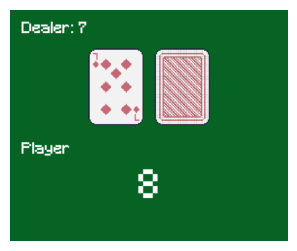

In [ ]:
#Rendering
pygame.init()
plt.rcParams["figure.figsize"] = [6.00, 3.00]
plt.imshow(env.render(mode='rgb_array'))
plt.axis('off')
plt.show()


Note sul gioco del BJ:

1.

Nell'impostazione data da Gym, tutti i reward ottenibili durante (cioè fin tanto il gioco non termina)  di una partita di BJ sono zero;  di fatto le ricompense ottenute negli stati terminali coincidono con il "return". Per tanto non ha senso applicare un di fattore sconto minore di uno, quindi gamma sara esattamente = 1.

2.

Anche se si dispone di una conoscenza buona dell'ambiente in cui si svolge il gioco del blackjack(regole, stati,...) , non sarebbe facile applicare metodi di programmazione dinamica (DP) per calcolare la funzione valore. I metodi DP richiedono la conoscenza della dinamica dell'ambiente, in particolare della  della funzione di distribuzione della transizione di stato (transition model); e non è facile determinare questa funzione per il blackjack. Per capirci, se la somma del giocatore è 14 e decide di restare, qual è la sua probabilità di terminare con una ricompensa di +1 in funzione della carta che il banco mostra? Tutte le probabilità devono essere calcolate prima di poter applicare la DP e tali calcoli sono spesso complessi e soggetti a errori.

Al contrario, generare i campioni di giochi richiesti dai metodi Monte Carlo è molto facile!

### First-visit Monte Carlo Prediction

Algoritmo First-visit MC:

0.
Inizializza delle strutture dati in modo di avere un mapping, per ogni stato:

total_return : state -> Somma totale dei return di ogni state, ottenuta durante tutto il training

N : state -> Numero di volte che lo state è apparso durante tutti gli episodi


1.
Input: definisci una policy da valutare

2.
Genera un certo numero di episodi che seguono la policy prima definita

3.
Per ogni episodio generato:
ricava il return di ogni stato incontrato, se incontri lo stesso stato più di una volta considera solo la prima visita

4.
Stima la vaule fuction di ogni stato  dividendo:

( Somma totale dei return di un certo stato ottenuta durante tutto il training)  $\div$   ( Numero di volte che tale stato è apparso durante tutti gli episodi )


In [ ]:
# Il codice sottostante è stato ispirato ed ha come riferimento:
# https://github.com/PacktPublishing/Deep-Reinforcement-Learning-with-Python/tree/master/04.%20Monte%20Carlo%20Methods
# di Sudharsan Ravichandiran


In [ ]:
# Definiamo una policy di input per la fase di evaluation
#
# Come si comporta questa semplice policy:
# Se il valore totale del giocatore: state[0], è superiore a 18,
# meglio non chiedere un'altra carta: stick = 0, in quanto si rischia di perdere la partita
# In tutti gli altri casi, chiede carta hit = 1

def policy(state):
    if state[0] > 18:
       return 0
    return 1

In [ ]:
# Generiamo un singolo episodio utilizzando la policy data come input
#
# " Generate an episode following policy : S_0, A_0, R_1, S_1, A_1, R_2,...,S_{T-1}, A_{T-1}, R_T "

def generate_episode(policy):

    # Definiamo una lista chiamato episodio gli esiti della partita
    episode = []

    #inizializziamo lo stato reimpostando l'ambiente
    state = env.reset()

    #print("Stato di partenza: ", state)

    # Ripeti il gioco fino alla sua fine
    while True:

        #selezioniamo l'azione in base alla politica specificata
        action = policy(state)

        #eseguiamo l'azione e memorizziamo le informazioni della partita
        next_state, reward, done, _ = env.step(action)

        #memorizza lo stato di partenza, l'azione eseguita e la ricompensa otteunta, nella lista "episode"
        episode.append((state, action, reward))

        if done:
            break

        state = next_state

    return episode

In [ ]:
#Come possiamo osservare, l'output di ogni step della partita è sotto forma di
# (state, action, reward) : (tupla, numero intero, numero float)
generate_episode(policy)

[((15, 2, True), 1, 0.0), ((15, 2, False), 1, -1.0)]

##### Premessa tecnica del codice che seguirà

In [ ]:
# Nota tecnica :
#
# per maggiori info su Defaultdict
# https://www.geeksforgeeks.org/defaultdict-in-python/
# Di base
# "The functionality of both dictionaries and defaultdict are almost same except for the fact that
# defaultdict never raises a KeyError.
# It provides a default value for the key that does not exists."

defaultdict_demo = defaultdict(float)
defaultdict_demo[1] = 99.99
# un classico dict = {}, nelle due righe successive darebbe errore
#  in quanto nel dizionario demo non esiste la Key = 3 o la Key = 7
defaultdict_demo[3]
defaultdict_demo[7]
print(defaultdict_demo)
print("---")
print(defaultdict_demo[3])

defaultdict(<class 'float'>, {1: 99.99, 3: 0.0, 7: 0.0})
---
0.0


In [ ]:
#a = generate_episode(policy)
a = [((9, 4, False), 1, 0.0), ((13, 4, False), 1, 0.0), ((21, 4, False), 0, 1.0)]
print(a)

# la funzione zip(*) scoppatta i dati in ingresso:
# maggiori info : https://www.geeksforgeeks.org/zip-in-python/
xs,xa,xr = zip(*a)
print(" -- ")
print(xs)
print(xa)
print(xr)

print("\n*\n")

# La funzione enumerate() aggiunge un contatore a un iterabile, e lo restituisce

for t, st in enumerate(xs):
  print("Contatore:",t)
  print("st : ", st)


[((9, 4, False), 1, 0.0), ((13, 4, False), 1, 0.0), ((21, 4, False), 0, 1.0)]
 -- 
((9, 4, False), (13, 4, False), (21, 4, False))
(1, 1, 0)
(0.0, 0.0, 1.0)

*

Contatore: 0
st :  (9, 4, False)
Contatore: 1
st :  (13, 4, False)
Contatore: 2
st :  (21, 4, False)


In [ ]:
#Esplicitazione tecnica del codice usato
#
# Innanzitutto, definiamo due dizionarii per memorizzare:
# l'insime di "return" ottenuti in funzione degli state.
total_return = defaultdict(float)
total_return[(20, 10, False)] =  3.0 # gli diamo anche alcuni valori di partenza
total_return[(20, 18, False)] += 5.0  # se la chiave non è presente gli da valore zero ed in questo caso poi incrementa di 5.0
# il numero di volte in cui lo stato viene visitato nel corso degli episodi "N[state]"
N = defaultdict(int)

#Imposta il numero di episodi che vogliamo generare:
num_iterations = 4

for i in range(num_iterations):

    #Generiamo un singolo episodio utilizzando la policy specificata
    episode = generate_episode(policy)

    #Memorizza in un certo modo tutti gli stati, le azioni, i rewards ottenuti dall'episodio
    states, actions, rewards = zip(*episode)

    print("\n EP",i+1)
    print("states: ", states)
    print("rewards", rewards)
    print("--")
    #Poi per ogni step dell'episodio generato
    for t, state in enumerate(states):
        print("t :", t)
        gh = states[0:t]
        print("states[0:t] ", gh)
        print("state ;", state)

        #Se lo state non è già stato visitato nel segunte episodio, fai i sucessivi aggiornamenti
        if state not in states[0:t]:

            R = (sum(rewards[t:]))
            print("rewards[t:] ", rewards[t:])
            print("R = sum(rewards[t:] : ",R)

            total_return[state] =  total_return[state] + R
            print(f"total_return[{state}] : ",total_return[state])

            # Aggiorna il numero di volte in cui un certo stato viene visitato
            N[state] =  N[state] + 1

print("\nFINALE")
print(total_return)
print(N)


 EP 1
states:  ((13, 9, True), (14, 9, True), (18, 9, True), (19, 9, True))
rewards (0.0, 0.0, 0.0, 0.0)
--
t : 0
states[0:t]  ()
state ; (13, 9, True)
rewards[t:]  (0.0, 0.0, 0.0, 0.0)
R = sum(rewards[t:] :  0.0
total_return[(13, 9, True)] :  0.0
t : 1
states[0:t]  ((13, 9, True),)
state ; (14, 9, True)
rewards[t:]  (0.0, 0.0, 0.0)
R = sum(rewards[t:] :  0.0
total_return[(14, 9, True)] :  0.0
t : 2
states[0:t]  ((13, 9, True), (14, 9, True))
state ; (18, 9, True)
rewards[t:]  (0.0, 0.0)
R = sum(rewards[t:] :  0.0
total_return[(18, 9, True)] :  0.0
t : 3
states[0:t]  ((13, 9, True), (14, 9, True), (18, 9, True))
state ; (19, 9, True)
rewards[t:]  (0.0,)
R = sum(rewards[t:] :  0.0
total_return[(19, 9, True)] :  0.0

 EP 2
states:  ((21, 8, True),)
rewards (1.0,)
--
t : 0
states[0:t]  ()
state ; (21, 8, True)
rewards[t:]  (1.0,)
R = sum(rewards[t:] :  1.0
total_return[(21, 8, True)] :  1.0

 EP 3
states:  ((14, 3, False),)
rewards (-1.0,)
--
t : 0
states[0:t]  ()
state ; (14, 3, False)


#### Calcolo della funzione valore

In [ ]:
# Innanzitutto, definiamo due dizionarii per memorizzare:
# l'insime di "return parziali" ottenuti in funzione degli state.
# il numero di volte in cui lo stato viene visitato nel corso degli episodi "N[state]"
total_return = defaultdict(float)
N = defaultdict(int)

#Imposta il numero di episodi che vogliamo generare:
num_iterations = 1_000_000

for i in range(num_iterations):

    #Generiamo un singolo episodio utilizzando la policy specificata
    episode = generate_episode(policy)

    #Memorizza in un certo modo tutti gli stati, le azioni, i rewards ottenuti dall'episodio
    states, actions, rewards = zip(*episode)

    #Poi per ogni step dell'episodio generato
    for t, state in enumerate(states):

        #Se lo state non è già stato visitato nel segunte episodio, fai i sucessivi aggiornamenti
        if state not in states[0:t]:

            # Calcoliamo il return R di un certo stato come somma dei reward ottenuti.
            # Di fatto il reward ottenuto nello stato terminale coincidono con il "return".
            # E' una somma di 0.0 che finisce con 1.0 oppure -1.0 oppure 0.0
            R = (sum(rewards[t:]))

            #Aggiorna il dizionario total_return, mappando gli stati con i return ottenuti
            total_return[state] =  total_return[state] + R

            # Aggiorna il numero di volte in cui un certo stato viene visitato
            N[state] =  N[state] + 1


In [ ]:
print(len(total_return))
print(len(N))
# in genere gia con 10_000 episodi si raggiungono i 280 stati

280
280


In [ ]:
# Per una migliore comprensione dei dati, possiamo convertirli in un dataframe Pandas.
# Tuttavia, questa conversione non è necessaria per implementare l'algoritmo in modo efficiente.

# Converti il dizionario total_returns in un dataframe pandas:
total_return = pd.DataFrame(total_return.items(),columns=['state', 'total_return'])

# Converti il dizionario N in un dataframe pandas:
N = pd.DataFrame(N.items(),columns=['state', 'N'])

# Unisci i due dataframe usando come base comune gli state
df = pd.merge(total_return, N, on="state")

# Dai un occhiata alle prime righe del dataframe pandas
#df.head(10)

In [ ]:
# Qui ricaviamo la funzione valore (expected retur) per ogni stato,
# approssimandola con la media empirica dei returns ottenuti

df['value'] = df['total_return'] / df['N']

df.head(15)


,state,total_return,N,value
0,"(13, 1, False)",-5520.0,9370,-0.589114
1,"(19, 1, False)",-1193.0,10645,-0.112071
2,"(15, 1, False)",-6371.0,9889,-0.644251
3,"(6, 5, False)",-550.0,1466,-0.375171
4,"(15, 5, False)",-5235.0,9992,-0.523919
5,"(18, 8, False)",-6318.0,10612,-0.595364
6,"(21, 10, True)",16794.0,18243,0.920572
7,"(10, 10, False)",-1703.0,15049,-0.113164
8,"(19, 10, False)",-772.0,42349,-0.018229
9,"(17, 8, False)",-5884.0,10363,-0.567789


##### Studiamo un pò più da vicino le informazioni ottenute dal nostro algoritmo Monte Carlo  

In [ ]:
# Riordina i dati in base alla funzoine valore con valore maggiore
kf = df.sort_values(by=['value'],ascending=False)

kf.head(30)

,state,total_return,N,value
115,"(21, 9, True)",4440.0,4495,0.987764
92,"(21, 7, True)",4392.0,4448,0.987410
169,"(21, 8, True)",4553.0,4623,0.984858
141,"(21, 6, True)",4496.0,4575,0.982732
170,"(21, 5, True)",4416.0,4509,0.979375
129,"(21, 2, True)",4422.0,4516,0.979185
118,"(21, 3, True)",4458.0,4554,0.978920
54,"(21, 4, True)",4505.0,4604,0.978497
153,"(21, 9, False)",6209.0,6616,0.938482
167,"(21, 8, False)",6151.0,6572,0.935940


In [ ]:
# Qui i dati sono ordinati in base al numero di volte che
# si verificano. Dal minore al maggiore.
# Lo stato (20,10, False) si è verificato 56179 volte
df.sort_values(by=['N'])

,state,total_return,N,value
173,"(4, 3, False)",-127.0,424,-0.299528
222,"(4, 8, False)",-145.0,435,-0.333333
275,"(12, 6, True)",4.0,441,0.009070
236,"(4, 2, False)",-106.0,441,-0.240363
272,"(12, 4, True)",-31.0,443,-0.069977
...,...,...,...,...
53,"(16, 10, False)",-25055.0,40504,-0.618581
20,"(17, 10, False)",-26973.0,42001,-0.642199
8,"(19, 10, False)",-772.0,42349,-0.018229
14,"(18, 10, False)",-28370.0,42523,-0.667168


In [ ]:
df.sort_values(by=['total_return'],ascending=False)

,state,total_return,N,value
21,"(20, 10, False)",24275.0,56179,0.432101
48,"(21, 10, False)",23712.0,26693,0.888323
6,"(21, 10, True)",16794.0,18243,0.920572
36,"(20, 7, False)",11132.0,14245,0.781467
63,"(20, 8, False)",11105.0,14144,0.785139
...,...,...,...,...
25,"(14, 10, False)",-21433.0,38349,-0.558893
30,"(15, 10, False)",-23248.0,39804,-0.584062
53,"(16, 10, False)",-25055.0,40504,-0.618581
20,"(17, 10, False)",-26973.0,42001,-0.642199


In [ ]:
#

df[df['state']==(21,9,False)]['value'].values

array([0.93848247])

In [ ]:
df[df['state']==(5,8,False)]['value'].values

array([-0.30371204])

#### Every visit v.s. First visit:

Si noti: gli stati possono essere visitati più volte nello stesso episodio.
Chiamiamo "First-visit", quando un certo stato si verifica in un singolo episodio per la prima visita.
Nella stima della funzione valore di un certo stato,
il metodo MC First-visit, considera solo la prima visita di uno stato per ricavare la media dei return. Il metodo MC Every-visit, invece, ad ogni visita (che puo essersi verificata due, tre, quattro ... volte) calcola la media dei return.

Concretamente, nel codice MC First-visit presentato sopra, l'unica differenza è nel rigo :

`if state not in states[0:t]:`

che nel MC Every visit non è presente; per tutto il resto, i due codici sono identici.

Per ulteriori approfondimenti:

https://ai.stackexchange.com/questions/10812/what-is-the-difference-between-first-visit-monte-carlo-and-every-visit-monte-car

*

In genere :

MC First-visit : Less bias, more variance

MC Every-visit : More bias, less variance

*

Convervenza

Entrambi,  First-visit MC e Every-visit MC,  convergono alla funzione valore $V^{\pi}(s)$  quando il numero di visite (o prime visite) a $s$ tende all'infinito.  

Nel caso First-visit MC, i return sono indipendenti e distribuiti in modo identico (independently and identically distributed, o IID: cioè ogni return ha la stessa distribuzione di probabilità, e le variabili sono indipendenti tra loro). Ogni media dei return è un'approssimazione dell "expected value", la deviazione standard del suo errore è pari a $1/√n$.

Le stime di Every-visit MC convergono quadraticamente.


# Monte Carlo control

## Quale azione selezionare?

Problema:

senza un'esplicita  funzione di transizione di stato (transition model) i valori della value fuction non sono sufficienti per determinare una " policy milgiore " di quella valutata in partenza (vedi: https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Programmazione_Dinamica_ITA.ipynb)

Soluzione:

Per la fase di policy control, i metodi MC necessitano di lavorare con la funzione action-value : $Q^{\pi}(s,a)$.

Per quello che riguarda i metodi Every visit e First visit MC, nella fase di evaluation, usare la funzione action-value  $Q^{\pi}(s,a)$ significa essenzialmete fare la stessa cosa che si è fatto con la value function; la diffrezna principale sta nel trattare visite di coppie stato-azione, e non di stati singoli. Una coppia stato-azione $(s,a)$ si verifica in un episodio quando lo stato $s$ viene visitato e l'azione $a$ viene intrapresa in esso. Questi metodi convergono quadraticamente, quando il numero di visite a ciascuna coppia stato-azione si avvicina all’infinito.


Il principale problema che i metodi MC possono incontrare nella fase di evaluation, usando la funzione action value, è che *molte coppie $(s,a)$ potrebbero non essere mai visitate*. Ad esmepio, se $\pi$ è una politica deterministica, allora si osserveranno return solo per una specifica azione per ogni stato; ignorando tutte le altre azioni. Le quali potrebbere potenzilmente produrre politiche ottimali. Quindi abbiamo bisogno di stimare il valore di tutte le azioni disponibili  (o per lo meno, quante più azioni possibili) di ogni stato.

Allora, come garantire un’esplorazione continua?

Una soluzione : *nella fase iniziale fare in modo che ogni coppia stato-azione $(s,a)$ abbia una probabilità maggiore di zero di essere selezionata come inizio.* Questo in linea teorica, garantisce che tutte le coppie stato-azione siano visitate un numero infinito di volte nel limite di un numero infinito di episodi. Chiamiamo questa assunzione : **exploring starts**.

L'assunzione "exploring starts" è talvolta utile, ma ovviamente non è possibile fare affidamento su questa in generale, in particolare quando si apprende direttamente dall'interazione con un ambiente reale. In tal caso è improbabile che le condizioni di partenza siano così utili. L’approccio alternativo più comune per garantire che tutte le coppie stato-azione siano visitate è quello di considerare policy stocastiche, per le quali, in ogni stato, tutte le azioni disponibili hanno una probabilità maggiore di zero di essere selezionate.

Nei metodi MC, la fase di policy improvement consiste nel rendere la policy "greedy" in base alla funzione action-value (l'utilizzo di tale funzione rende non necessario il modello di transizione di stato per la costruzione di una policy greedy come per la DP). In questo caso una policy greedy sceglie un'azione che massimizza $q(s,a)$, in formula:


$\pi_{greedy}(s) = \arg \max_\limits{a} \; q(s,a),  \:\; ∀s \in S$


$\;$








# Monte Carlo policy optimization


Nel processo di policy iteration, cioè:

 $\pi_{0}$ - policy evaluation ->
 $q_{\pi_{0}}(s,a) $ - policy improvement -> $\pi_{1}$ - policy evaluation -> $q_{\pi_{1}}(s,a)$ - policy improvement -> $\pi_{2}$ - ect ...

 che porta ad una policy ottimale, nei metodi MC sono necessarie due assunzioni per garantirne la convergenza :
 1. supponiamo di poter osservare effettivamente un numero infinito di episodi
 2. gli episodi siano generati in base alla "exploring starts"

Per ottenere un algoritmo praticabile dovremo rimuovere entrambe le ipotesi.

Concentriamoci sulla prima:

la policy evaluation opera su un numero infinito di epsidi; questa ipotesi è relativamente facile da rimuovere. Infatti, anche i metodi DP classici, convergono solo asintoticamente alla vera funzione del valore. L'idea è di accontentarsi  di approssimazioni della $q_{\pi_{k}}(s,a) $ in certi limiti di errore:

cioè durante ciascuna fase di policy evaluation vengono adottate misure sufficienti per garantire che questi limiti siano rispettati. Questo approccio consente una corretta convergenza fino ad un certo livello di approssimazione. Tuttavia, tale solzione è probabile che richieda un numero eccessivo di episodi per essere utile nella pratica.

Una alternativa può essere quella di porre un limite alla iterazioni nella fase di policy evaluation, e poi passare alla policy improvement. In pratica alla fine ogni fase di policy evaluation spostiamo di un pò il valore della funzione action-value $q$ "in avanti" , ma non ci aspettiamo di essere vicini effettivemente al valor ottimale, se non dopo molti cicli di policy evaluation<-->policy improvement.


### Monte Carlo with Exploring Starts

Per la stima della policy ottimale.

*

Note sull'algoritmo :

I  cicli policy evaluation e policy improvement si alternano "episode-by-episode" : dopo ogni episodio $k$: i returns campionati sono usati per ricavare $q_{\pi_{k}}(s,a)$; subito dopo la policy $\pi_{k}$ viene migliorata (greedy) in base ai valori di $q_{\pi_{k}}(s,a)$ ottenuti

In [ ]:
# Codice sottostante prende ispirazione
# dal codice https://twice22.github.io/rl-part4/
# e dal codice https://github.com/aditya1702/Machine-Learning-and-Data-Science/blob/master/Implementation%20of%20Reinforcement%20Learning%20Algorithms/Tensorflow%20Implementations/Monte%20Carlo%20Methods/Monte%20Carlo%20Control%20with%20Exploring%20Starts.ipynb



def generate_episode_Exploring_Starts(policy):
    state = env.reset()
    start = True # flag per lo stato iniziale

    episode = [] # Definiamo una lista che tiene traccia gli esiti della partita

    while True:

        # Condizione Exploring Starts:
        # se lo stato è iniziale, genera un azione random
        if start:
             action = np.random.choice([0,1])
             start=False
        # Altrimenti, se lavori con un stato successivo a quello iniziale:
        #   se lo stato corrente è compreso dalla policy che l'agente sta costruendo episodio per episodio,
        #   allora seleziona l'azione in base a tale policy;
        #   altrimenti, esegui una policy arbitraria iniziale che produce sempre l'azione = 1 , cioè "hit"
        else :
           action = policy[state] if state in policy else 1

        next_state, reward, terminate, _ = env.step(action)
        episode.append((state, action, reward))

        if terminate:
            break

        state = next_state

    return episode


#### Esplicitazione tecnica del codice usato

In [ ]:
# Fase di inizializzazione delle strutture dati utilizzate
policy = {}

Q_table = defaultdict(lambda: np.zeros(env.action_space.n)) #  Note : lambda: np.zeros(2) = [0. 0.], lambda da in unscita un array di zeri a due elementi
# La Q_table ha due valori per ogni stato : una per l'azione stick, altra per l'azione hit
# Esempio : Q_table:  {(14, 6, False): [-1.,  5.]}
# per lo state : (14, 6, False), per azione(stick) = 0 ha valore = -1.; per hit il valore di q = 5.


returns_sum = defaultdict(float) # Nota:  returns(state, action)
returns_count = defaultdict(int)

# Parametri
gamma = 1



In [ ]:
#
# Da riterarsi più volte con i trajectory diferenti
#

#trajectory = generate_episode_Exploring_Starts(policy)

###campiomaneti giudati, di fantasia ma servono a capire il codice

#trajectory = [((7, 6, False), 1, 0.0),((7, 6, False), 0, 0.0),((7, 6, False), 1, 0.0),((14,6 , False), 0, -1.0)]

#trajectory = [((7,6 , False), 1, 97.0)]

#trajectory = [((7,6 , False), 1, -1.0),((11, 4, False), 0, -11.0),((11, 4, False), 0, 5.0),((7,6 , False), 1, -60.0)]

#trajectory = [((17, 3, False), 1, 0.0), ((20, 3, False), 1, 0.0), ((21, 3, False), 1, -1.0)]

trajectory = [((17, 3, False), 1, -5.0), ((17, 3, False), 1, 10.0), ((21, 3, False), 1, 5.0)]

G, T = 0, len(trajectory)
print(trajectory)
visited_state = []
for i in range(T):
 #print(trajectory[i][0])
 visited_state.append((trajectory[i][0],trajectory[i][1]))
print("visited_state : ", visited_state)

for i in range(T-1, -1, -1):
       print("\n  i:",i)
       state, action, reward = trajectory[i]
       G += gamma**i * reward # ha solo un senso formale, di fatto, in questo caso, G = reward
       print("  G : ",G)

       visited_state.pop()
       print("  ^ visited_state ^ 2: ", visited_state)
       print("\t (state, action) not in visited_state : ", (state, action) not in visited_state)
       if (state, action) not in visited_state: # A meno che la coppia (state, action) non sia stata già visitata in questo episodio, fai:

                #Per ricavare la media dei Return
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1
                print("returns_sum = ",dict(returns_sum)) # to print defaultdict variable without its type
                print("returns_cont = ",dict(returns_count))

                Q_table[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
                print(f"Q_table[{state}][{action}] = returns_sum[(state, action)] / returns_count[(state, action) : ", Q_table[state][action])
                print("Q_table", dict(Q_table))

                policy[state] = np.argmax(Q_table[state]) # update policy greedily
                print(f" Azione greedy della policy[{state}] : ",policy[state])
                print("policy aggiornata :", policy)


[((17, 3, False), 1, -5.0), ((17, 3, False), 1, 10.0), ((21, 3, False), 1, 5.0)]
visited_state :  [((17, 3, False), 1), ((17, 3, False), 1), ((21, 3, False), 1)]

  i: 2
  G :  5.0
  ^ visited_state ^ 2:  [((17, 3, False), 1), ((17, 3, False), 1)]
	 (state, action) not in visited_state :  True
returns_sum =  {((14, 6, False), 0): -1.0, ((7, 6, False), 0): -1.0, ((7, 6, False), 1): 29.0, ((11, 4, False), 0): -66.0, ((21, 3, False), 1): 4.0, ((20, 3, False), 1): -1.0, ((17, 3, False), 1): -1.0}
returns_cont =  {((14, 6, False), 0): 1, ((7, 6, False), 0): 1, ((7, 6, False), 1): 3, ((11, 4, False), 0): 1, ((21, 3, False), 1): 2, ((20, 3, False), 1): 1, ((17, 3, False), 1): 1}
Q_table[(21, 3, False)][1] = returns_sum[(state, action)] / returns_count[(state, action) :  2.0
Q_table {(14, 6, False): array([-1.,  0.]), (7, 6, False): array([-1.        ,  9.66666667]), (11, 4, False): array([-66.,   0.]), (21, 3, False): array([0., 2.]), (20, 3, False): array([ 0., -1.]), (17, 3, False): array([

#### Training Loop Monte Carlo Exploring Start

In [ ]:
# Fase di inizializzazione delle strutture dati utilizzate
policy = {}

Q_table = defaultdict(lambda: np.zeros(env.action_space.n))

returns_sum = defaultdict(float) # Nota:  returns(state, action)
returns_count = defaultdict(int)

# Parametri
gamma = 1
num_episodes = 500_000

for episode in range(num_episodes):
  trajectory = generate_episode_Exploring_Starts(policy)
  G, T = 0, len(trajectory)

  visited_state = []
  for i in range(T):
    visited_state.append((trajectory[i][0],trajectory[i][1]))

  for i in range(T-1, -1, -1):
       state, action, reward = trajectory[i]
       G += gamma**i * reward # ha solo un senso formale, di fatto, in questo caso, G += reward

       visited_state.pop()
       if (state, action) not in visited_state: # A meno che la coppia (state, action) non sia stata già visitata in questo episodio, fai:

                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1

                Q_table[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]

                policy[state] = np.argmax(Q_table[state]) # update policy greedily




##### Analisi dei dati di training

In [ ]:
print(len(policy))
print(len(Q_table))

# Converti il dizionario total_returns in un dataframe pandas:
Q_table_pd = pd.DataFrame(Q_table.items(),columns=['state','action'])

# Converti il dizionario N in un dataframe pandas:
policy_pd = pd.DataFrame(policy.items(),columns=['state', 'action'])


policy_pd.head(5)

280
280


,state,action
0,"(20, 9, False)",0
1,"(7, 5, False)",1
2,"(13, 10, False)",1
3,"(17, 9, True)",1
4,"(20, 10, False)",0


In [ ]:
Q_table_pd.head(5)

,state,action
0,"(20, 9, False)","[0.7618500430910657, -0.8630681818181818]"
1,"(7, 5, False)","[-0.13023255813953488, 0.035940803382663845]"
2,"(13, 10, False)","[-0.5690338311490399, -0.4634963862993611]"
3,"(17, 9, True)","[-0.45136186770428016, -0.23595505617977527]"
4,"(20, 10, False)","[0.4326483189310871, -0.8565229563269877]"


In [ ]:
# Crea una funzione valore dalla action-value function q, selezionando l'azione migliore in ogni stato

V = defaultdict(float)
for state, actions in Q_table.items():
    action_value = np.max(actions)
    V[state] = action_value


In [ ]:
V_pd = pd.DataFrame(V.items(),columns=['state','Value'])
V_pd = V_pd.sort_values(by=['Value'],ascending=False)
V_pd.head(5)

,state,Value
165,"(21, 9, True)",0.992091
181,"(21, 7, True)",0.988304
98,"(21, 8, True)",0.985087
112,"(21, 2, True)",0.980886
173,"(21, 5, True)",0.976974


In [ ]:
def plot_policy(policy):

    def get_Z(player_hand, dealer_showing, usable_ace):
        if (player_hand, dealer_showing, usable_ace) in policy:
            return policy[player_hand, dealer_showing, usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(1, 11)
        y_range = np.arange(11, 22)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(player_hand, dealer_showing, usable_ace) for dealer_showing in x_range] for player_hand in range(21, 10, -1)])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[1, 11, 11, 22])
        plt.xticks(x_range, ('A', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
        plt.yticks(y_range)
        ax.set_xlabel('Dealer Showing')
        ax.set_ylabel('Player Hand')
        ax.grid(color='black', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0, 1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
        cbar.ax.invert_yaxis()

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace', fontsize=12)
    get_figure(True,ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace', fontsize=12)
    get_figure(False, ax)
    plt.show()

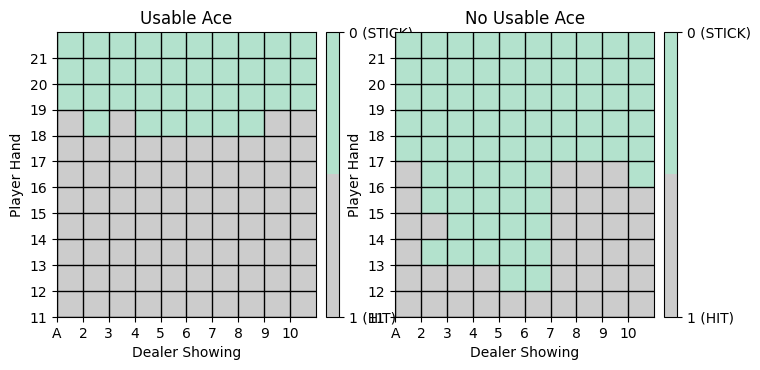

In [ ]:
plot_policy(policy)

In [ ]:
def test_optimal_policy(policy, numero_partite=1_000):

    tot_rew = 0
    tot_lost = 0
    state = env.reset()

    for _ in range(numero_partite):

        done = False
        while not done:
            next_state, reward, done,_ = env.step(policy[state])

            state = next_state
            if reward > 0 :
               tot_rew += reward

            if reward < 0 :
               tot_lost += reward

            if done:
                state = env.reset()


    print("Agente RL_MC")
    print("Sono state vinte : ",int(tot_rew)," su ", numero_partite, "partite giocate")
    print("Sono state perse : ",int(tot_lost),". Premio accumualto Tot : ", (tot_rew+tot_lost))


def test_optimal_random_policy(numero_partite=1_000):

    tot_rew = 0
    tot_lost = 0
    state = env.reset()

    for _ in range(numero_partite):

        done = False
        while not done:
            next_state, reward, done,_ = env.step(np.random.choice([0,1]))

            state = next_state
            if reward > 0 :
               tot_rew += reward

            if reward < 0 :
               tot_lost += reward

            if done:
                state = env.reset()


    print("\nAgente Random")
    print("Sono state vinte : ",int(tot_rew)," su ", numero_partite, "partite giocate")
    print("Sono state perse : ",int(tot_lost),". Premio accumualto Tot : ", (tot_rew+tot_lost))


test_optimal_policy(policy)

test_optimal_random_policy(numero_partite=1_000)

Agente RL_MC
Sono state vinte :  433  su  1000 partite giocate
Sono state perse :  -482 . Premio accumualto Tot :  -49.0

Agente Random
Sono state vinte :  310  su  1000 partite giocate
Sono state perse :  -645 . Premio accumualto Tot :  -335.0


In [ ]:
def plot_value_function(V, title = "Value Function"):

    min_x = 11 # min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    # Find value for all (x, y) coordinates
    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))

    def plot_surface(X, Y, Z, title):
        fig = plt.figure(figsize = (9, 6))
        ax = fig.add_subplot(111, projection = '3d')
        surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,
                               cmap = matplotlib.cm.coolwarm, vmin = -1.0, vmax = 1.0)
        ax.set_xlabel('Player Sum')
        ax.set_ylabel('Dealer Showing')
        ax.set_zlabel('Value')
        ax.set_title(title)
        ax.view_init(ax.elev, -120)
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "{} (No Usable Ace)".format(title))
    plot_surface(X, Y, Z_ace, "{} (Usable Ace)".format(title))

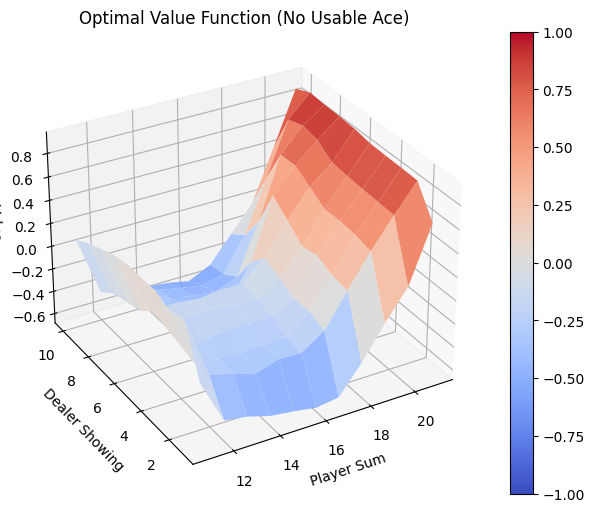

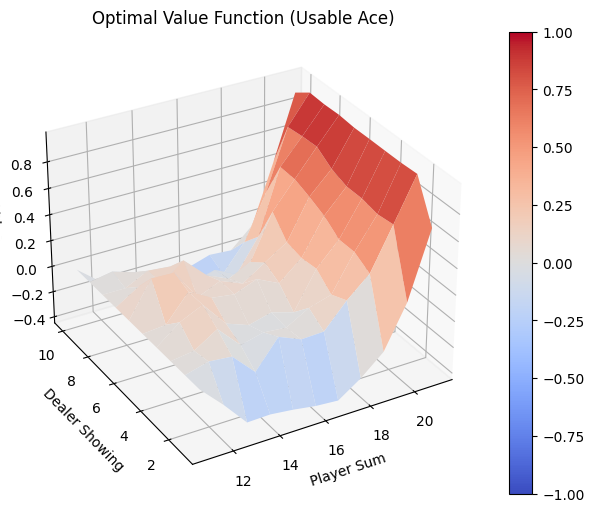

In [ ]:
plot_value_function(V, title="Optimal Value Function")


Nota :

I grafici della politica ottimale e della funzione di valore trovati sono molto simili al quelli esposti nel testo di Reinforcement Learning di Sutton e Barto, Second Edition, pag PDF : 122



###  Monte Carlo Control without Exploring starts

Fare i conti con seconda assunzione, ovvero come evitare l'improbabile assunzione Exploring starts?

L'unico modo generale per assicurarsi che tutte le azioni siano selezionate infinite volte è che l'agente continui a selezionarle durante il training.

Due approcci di fondo:
-  Metodi on-policy: per valutare o migliorare la politica utilizzata per prendere decisioni (e produrre dati)
-  Metodi off-policy: valutare o migliorare una politica diversa da quella utilizzata per generare i dati.


$\;$

Nei metodi di controllo on-policy la policy usata è generalmente "soft".

Una **soft-policy** è una policy che fa sì che per ogni stato, esista una probabilità positiva (anche minima) di selezionare ciascuna delle azioni disponibili (praticamente in ogni stato esiste sempre la possibilità di selezionare una qualsiasi azione).



**ϵ-greedy policy**

Premessa: la caridinalità $|Actions(state)|$  indica il numero di azioni totali disponibili in un certo stato.

Le ϵ-greedy policy sono policy che selezionano:


- con la probabilità: $1 -ϵ + \frac{ϵ}{|Action(state)|} $,  l'azione greedy che massimizza la funzione costo (ad esempio $q_{\pi}(s,a)$) in un certo stato.

- con la probabilità $\frac{ϵ}{|Actions(state)|}$ , una delle azioni non-greedy disponibili in un certo stato;  al fine di esplorare nuove possibilità.





**L' ϵ-greedy-policy sono un esempio di soft-policy**, in quanto in ogni stato, si ha la probabilità minima: $\frac{ϵ}{|Actions(state)|}$ , di selezionare una qualsiasi azione disponibile.

Spesso, per semplificare il formalismo, e quando l'ambiente in cui si svolge il training lo consente, l'implementazione di tale policy si riduce a definire con $1-ϵ$ la probabilità di selezionare l'azione greedy e con $ϵ$ la probabilità di selezionare una delle azioni non-greedy.



$\;$

Convergenza:

Il teorema "Policy improvement" garantisce che qualsiasi politica ϵ-greedy rispetto a $q_{\pi}(s,a)$, sia un miglioramento rispetto a qualsiasi politica ϵ-soft di $\pi$. Per dimostrazione vedi pag PDF 123, Sutton e Barto.





#### On-policy first-visit MC control (using ϵ-soft policies)

Per la stima della policy ottimale.

In [ ]:
def generate_episode_soft_policy(s_pi):
    state = env.reset()

    episode = [] # Definiamo una lista che tiene traccia gli esiti della partita

    while True:

        action =  1 # sceglie sempre azione 1, ma se ...

        if state in s_pi:
            probs = s_pi[state]
            #print(f"\tprobs = s_pi[{state}] = ",probs)
            action = np.random.choice(np.arange(env.action_space.n), p=probs)
            # Note Tecniche:
            # 1. np.arange(4)  produce un array del tipo [0, 1, 2, 3]
            #    nel nostro caso : np.arange(env.action_space.n) = [0 1]
            # 2. p è la probabilità associata a ciascun elemento nell'array. Se non fornito, il campione presuppone una distribuzione uniforme su tutte le voci.
            # Nel nostro caso, la probabilità con cui np.random.choice sceglie non è uniforme, ma definita da s_pi[state]
            #
            #print("\taction =", action )
        next_state, reward, terminate, _ = env.step(action)
        episode.append((state, action, reward))

        if terminate:
            break

        state = next_state

    return episode

##### Test delle parti nuove del codice

In [ ]:
#
#Test
#
n_actions = env.action_space.n
#Q_table = defaultdict(lambda: np.zeros(n_actions))
EPS = 0.6

e_policy = defaultdict(lambda: np.zeros(n_actions))
e_policy[(14, 6, False)][0] = 0.8
e_policy[(14, 6, False)][1] = 0.2
print("\tANTE e_policy = ", dict(e_policy))

#e = generate_episode_soft_policy(e_policy)

e = [((14, 6, False), 1, -5.0), ((21, 3, False), 0, 10.0),((11, 4, False), 0, 10.0) ]

Q_table = {(14, 6, False): [-1.,  0.], (11, 4, False): [-66.,   0.], (21, 3, False): [0.1, 0.]}
print("e =",e)
print("Q_table=", Q_table)
print("\n")

for i in range((len(e))-1, -1, -1):
      state, action, reward = e[i]
      best_action = np.argmax(Q_table[state])
      print(i)
      print("Q best_action =",best_action)

      for a_index in np.arange(n_actions):
         if a_index == best_action:
                  e_policy[state][a_index] = 1 - EPS + (EPS/n_actions)
                  print(f"e_policy[{state}][{a_index}] =  ", e_policy[state][a_index] )
         else:
                  e_policy[state][a_index] = EPS/n_actions
                  print(f"e_policy[{state}][{a_index}] = ", e_policy[state][a_index] )

print("\tPOST e_policy = ", e_policy)

	ANTE e_policy =  {(14, 6, False): array([0.8, 0.2])}
e = [((14, 6, False), 1, -5.0), ((21, 3, False), 0, 10.0), ((11, 4, False), 0, 10.0)]
Q_table= {(14, 6, False): [-1.0, 0.0], (11, 4, False): [-66.0, 0.0], (21, 3, False): [0.1, 0.0]}


2
Q best_action = 1
e_policy[(11, 4, False)][0] =  0.3
e_policy[(11, 4, False)][1] =   0.7
1
Q best_action = 0
e_policy[(21, 3, False)][0] =   0.7
e_policy[(21, 3, False)][1] =  0.3
0
Q best_action = 1
e_policy[(14, 6, False)][0] =  0.3
e_policy[(14, 6, False)][1] =   0.7
	POST e_policy =  defaultdict(<function <lambda> at 0x7a10b32d2950>, {(14, 6, False): array([0.3, 0.7]), (11, 4, False): array([0.3, 0.7]), (21, 3, False): array([0.7, 0.3])})


##### Training loop

In [ ]:
# Training loop

n_actions = env.action_space.n  # numero di azioni disponibili

# Fase di inizializzazione delle strutture dati utilizzate
e_policy = defaultdict(lambda: np.zeros(n_actions)) # definisce la probabilità di azione dato un certo stato,
#key (state,action) -> value probability

Q_table = defaultdict(lambda: np.zeros(env.action_space.n))

returns_sum = defaultdict(float) # Nota:  returns(state, action)
returns_count = defaultdict(int)

# Parametri
gamma = 1
num_episodes = 500_001
EPS = 0.25

for episode in range(num_episodes):
  trajectory = generate_episode_soft_policy(e_policy)
  G, T = 0, len(trajectory)

  visited_state = []
  for i in range(T):
    visited_state.append((trajectory[i][0],trajectory[i][1]))

  for i in range(T-1, -1, -1):
       state, action, reward = trajectory[i]
       G = gamma*G + reward # ha solo un senso formale, di fatto, in questo caso, G += reward

       visited_state.pop()
       if (state, action) not in visited_state: # A meno che la coppia (state, action) non sia stata già visitata in questo episodio, fai:

                returns_sum[(state, action)] += G  # returns_sum[(state, action)] = returns_sum[(state, action)] + G
                returns_count[(state, action)] += 1

                Q_table[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]

                best_action = np.argmax(Q_table[state])
                # alternativa:
                # best_action = max(list(range(env.action_space.n)), key = lambda x: Q_table[state][x])

                # aggiorna la soft_policy
                for a_index in np.arange(n_actions):
                   if a_index == best_action:
                       e_policy[state][a_index] = 1 - EPS + (EPS/n_actions)
                   else:
                       e_policy[state][a_index] = EPS/n_actions

  if (episode!= 0) and (episode % 100_000 == 0) :
               print("Q_TABLE                                              COUNT    0         1   ")
               print("Q_table[(17, 5, True)] = ", Q_table[(17, 5, True)]," Count : ",returns_count[((17, 5, True), 0)], " -  ",returns_count[((17, 5, True), 1)] )
               print("Q_table[(17, 8, True)] = ", Q_table[(17, 8, True)]," Count : ",returns_count[((17, 8, True), 0)], " -  ",returns_count[((17, 8, True), 1)] )
               print("Q_table[(18, 9, True)] = ", Q_table[(18, 9, True)]," Count : ",returns_count[((18, 9, True), 0)], " -  ",returns_count[((18, 9, True), 1)] )

               print("Q_table[(13, 5, False)] = ", Q_table[(13, 5, False)]," Count : ",returns_count[((13, 5, False), 0)], " -  ",returns_count[((13, 5, False), 1)] )
               print("Q_table[(13, 6, False)] = ", Q_table[(13, 6, False)]," Count : ",returns_count[((13, 6, False), 0)], " -  ",returns_count[((13, 6, False), 1)] )
               print("Q_table[(13, 7, False)] = ", Q_table[(13, 7, False)]," Count : ",returns_count[((13, 7, False), 0)], " -  ",returns_count[((13, 7, False), 1)] )

               print("Q_table[(11, 10, False)] = ", Q_table[(11, 10, False)]," Count : ",returns_count[((11, 10, False), 0)], " -  ",returns_count[((11, 10, False), 1)] )
               #print("\ne_policy")
               #print(pd.DataFrame(e_policy.items(),columns=['state','action']).head(4))
               print(" \n")


Q_TABLE                                              COUNT    0         1   
Q_table[(17, 5, True)] =  [0.19587629 0.        ]  Count :  97  -   16
Q_table[(17, 8, True)] =  [-0.5        -0.07142857]  Count :  20  -   84
Q_table[(18, 9, True)] =  [-0.04347826 -0.27777778]  Count :  92  -   36
Q_table[(13, 5, False)] =  [-0.17647059 -0.39423077]  Count :  697  -   104
Q_table[(13, 6, False)] =  [-0.13636364 -0.36111111]  Count :  660  -   108
Q_table[(13, 7, False)] =  [-0.48812665 -0.28671329]  Count :  379  -   429
Q_table[(11, 10, False)] =  [-0.52252252 -0.07848444]  Count :  222  -   1478
 

Q_TABLE                                              COUNT    0         1   
Q_table[(17, 5, True)] =  [ 0.03351955 -0.10526316]  Count :  179  -   38
Q_table[(17, 8, True)] =  [-0.61764706 -0.14136126]  Count :  34  -   191
Q_table[(18, 9, True)] =  [-0.18099548 -0.35483871]  Count :  221  -   62
Q_table[(13, 5, False)] =  [-0.16014235 -0.46296296]  Count :  1405  -   216
Q_table[(13, 6, False

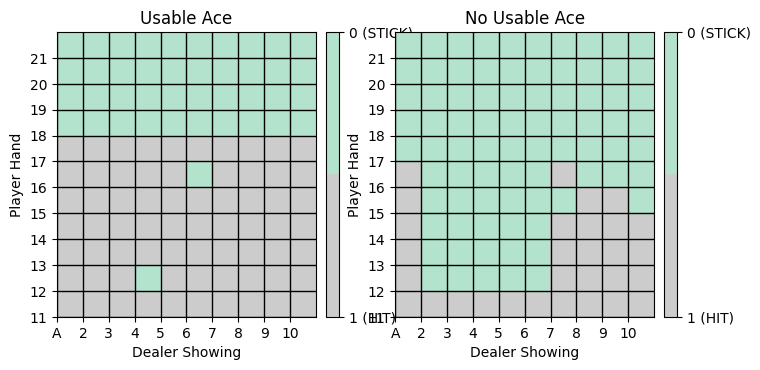

In [ ]:
# Per il grafico
# converti la stochastic policy ottenuta in una deterministic policy
#
deter_pi = {state: np.argmax(values) for state, values in e_policy.items()}
plot_policy(deter_pi)

##### Alternativa ϵ-greedy policy


Sotto, propongo un codice alternativo per l'implementazione di una policy epsilon-greedy, che risulta essere più intuitivo di quello proposto in precedenza.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q_TABLE                                              COUNT    0         1   
Q_table[(17, 5, True)] =  [-0.0375     -0.09090909]  Count :  80  -   33
Q_table[(17, 8, True)] =  [-0.28125     0.00900901]  Count :  32  -   111
Q_table[(18, 9, True)] =  [-0.17142857 -0.38709677]  Count :  105  -   31
Q_table[(13, 5, False)] =  [-0.14237856 -0.3045977 ]  Count :  597  -   174
Q_table[(13, 6, False)] =  [-0.15072934 -0.34841629]  Count :  617  -   221
Q_table[(13, 7, False)] =  [-0.4484127  -0.51226158]  Count :  504  -   367
Q_table[(11, 10, False)] =  [-0.49700599 -0.11310861]  Count :  334  -   1335
 

Q_TABLE                                              COUNT    0         1   
Q_table[(17, 5, True)] =  [-0.06521739 -0.28571429]  Count :  184  -   56
Q_table[(17, 8, True)] =  [-0.43396226 -0.12871287]  Count :  53  -   202
Q_table[(18, 9, True)] =  [-0.16587678 -0.54545455]  Count :  211  -   55
Q_table[(13, 5, False)] =  [-0.16282764 -0.34029851]  Count :  1259  -   335
Q_table[(13, 6, F

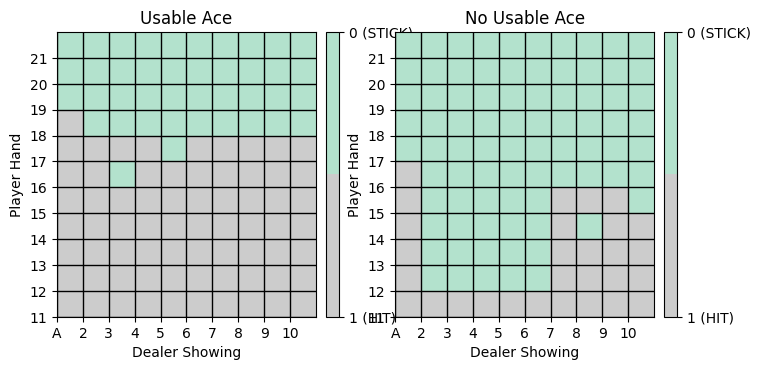

In [ ]:
def generate_episode_soft_policy(s_pi):
    state = env.reset()

    episode = []

    while True:

        action = np.random.choice([0, 1])

        if state in s_pi:
            supp = [s_pi[state], int(not(s_pi[state]))] # [0,1] oppure [1,0]
            action = np.random.choice(supp, p=[0.8, 0.2])  # p = probabilità di estrazione, nel 80% dei casi azione è "greedy"


        next_state, reward, terminate, _ = env.step(action)
        episode.append((state, action, reward))

        if terminate:
            break

        state = next_state

    return episode

#
# Training loop
#

n_actions = env.action_space.n  # numero di azioni disponibili

# Fase di inizializzazione delle strutture dati utilizzate
e2_policy =  {}

Q_table = defaultdict(lambda: np.zeros(env.action_space.n))

returns_sum = defaultdict(float) # Nota:  returns(state, action)
returns_count = defaultdict(int)

# Parametri
num_episodes = 500_000


for episode in range(num_episodes):
  trajectory = generate_episode_soft_policy(e2_policy)
  G, T = 0, len(trajectory)

  visited_state = []
  for i in range(T):
    visited_state.append((trajectory[i][0],trajectory[i][1]))

  for i in range(T-1, -1, -1):
       state, action, reward = trajectory[i]
       G += reward

       visited_state.pop()
       if (state, action) not in visited_state: # A meno che la coppia (state, action) non sia stata già visitata in questo episodio, fai:

                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1

                Q_table[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]

                best_action = np.argmax(Q_table[state])
                e2_policy[state] = best_action # update
                # alternativa:
                # best_action = max(list(range(env.action_space.n)), key = lambda x: Q_table[state][x])

  if (episode!= 0) and (episode % 100_000 == 0) :
               print("Q_TABLE                                              COUNT    0         1   ")
               print("Q_table[(17, 5, True)] = ", Q_table[(17, 5, True)]," Count : ",returns_count[((17, 5, True), 0)], " -  ",returns_count[((17, 5, True), 1)] )
               print("Q_table[(17, 8, True)] = ", Q_table[(17, 8, True)]," Count : ",returns_count[((17, 8, True), 0)], " -  ",returns_count[((17, 8, True), 1)] )
               print("Q_table[(18, 9, True)] = ", Q_table[(18, 9, True)]," Count : ",returns_count[((18, 9, True), 0)], " -  ",returns_count[((18, 9, True), 1)] )

               print("Q_table[(13, 5, False)] = ", Q_table[(13, 5, False)]," Count : ",returns_count[((13, 5, False), 0)], " -  ",returns_count[((13, 5, False), 1)] )
               print("Q_table[(13, 6, False)] = ", Q_table[(13, 6, False)]," Count : ",returns_count[((13, 6, False), 0)], " -  ",returns_count[((13, 6, False), 1)] )
               print("Q_table[(13, 7, False)] = ", Q_table[(13, 7, False)]," Count : ",returns_count[((13, 7, False), 0)], " -  ",returns_count[((13, 7, False), 1)] )

               print("Q_table[(11, 10, False)] = ", Q_table[(11, 10, False)]," Count : ",returns_count[((11, 10, False), 0)], " -  ",returns_count[((11, 10, False), 1)] )
               #print("\ne_policy")
               #print(e2_policy)
               print(" \n")


plot_policy(e2_policy)

# Concludendo


Un fatto importante dei metodi Monte Carlo è che le stime per ogni stato sono indipendenti tra loro. Questo significa che la stima per uno stato non dipende dalla stima di nessun altro stato. In altre parole, i metodi Monte Carlo non richiedono il "bootstrap" come nella programmazione dinamica.

*Si noti che l'onere computazionale per la stima del valore di un singolo stato è indipendente dal numero di stati totale.Questo rende i metodi Monte Carlo particolarmente attraenti quando si desidera stimare solo il valore di un sottoinsieme di stati. È possibile generare molti episodi campione partendo dagli stati di interesse e calcolare i return medi solo di questi stati, ignorando tutti gli altri.*

$\;$

"Caveat", ovvero, fattori da tenere in considerazione quando si utilizzano questi metodi:

1. Può essere applicato solo agli MDP con episodi terminali.

2.  È necessario attendere la fine dell'episodio per calcolare il return

3. In generale, presentano una varianza elevata, ma consistente in condizioni moderatamente stabili.

